In [2]:
import pandas as ps
from matplotlib import pyplot as pylot

In [13]:
df = ps.read_csv('bhp.csv')
df.shape

(13200, 7)

In [10]:
max1=df.price_per_sqft.quantile(0.999)
max1

50959.36200000098

In [11]:
min1 = df.price_per_sqft.quantile(0.001)
min1

1366.184

In [18]:
df1 = df[(df.price_per_sqft>min1)&(df.price_per_sqft<max1)]
df1.shape

(13172, 7)

In [22]:
upper = (df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std())
upper

23227.73653589432

In [24]:
lower = (df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std())
lower

-9900.429065502582

In [37]:
df2 = df1[(df1.price_per_sqft>lower)&(df1.price_per_sqft<upper)]
df2.shape

(13047, 7)

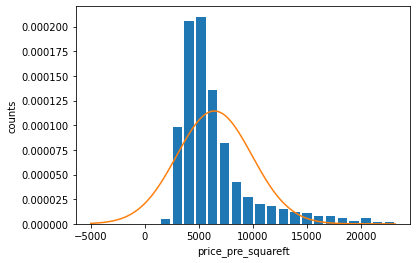

In [41]:
from scipy.stats import norm
import numpy as np 

pylot.hist(df2.price_per_sqft,bins=20,rwidth=0.8,density=True)
pylot.xlabel("price_pre_squareft")
pylot.ylabel("counts")
ran =np.arange(-5000, df2.price_per_sqft.max(), 100)
pylot.plot(ran,norm.pdf(ran,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

In [56]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head()

C:\Users\ragha\AppData\Local\Temp\ipykernel_13548\1701380421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [61]:
df3 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df3.shape

(12961, 8)